### Exploratory data Analysis of Tour Package data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('tour_package.csv')

In [3]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [5]:
df['CustomerID'].nunique()

4888

In [6]:
for col in df.columns:
    print(col)
    print(20*'-')
    print(df[col].unique())
    print()

CustomerID
--------------------
[200000 200001 200002 ... 204885 204886 204887]

ProdTaken
--------------------
[1 0]

Age
--------------------
[41. 49. 37. 33. nan 32. 59. 30. 38. 36. 35. 31. 34. 28. 29. 22. 53. 21.
 42. 44. 46. 39. 24. 43. 50. 27. 26. 48. 55. 45. 56. 23. 51. 40. 54. 58.
 20. 25. 19. 57. 52. 47. 18. 60. 61.]

TypeofContact
--------------------
['Self Enquiry' 'Company Invited' nan]

CityTier
--------------------
[3 1 2]

DurationOfPitch
--------------------
[  6.  14.   8.   9.  30.  29.  33.  22.  21.  32.  25.  27.  11.  17.
  15.  13.  12.  16.  10.  31.  18.  nan  24.  35.  28.  20.  26.  34.
  23.   5.  19. 126.   7.  36. 127.]

Occupation
--------------------
['Salaried' 'Free Lancer' 'Small Business' 'Large Business']

Gender
--------------------
['Female' 'Male' 'Fe Male']

NumberOfPersonVisiting
--------------------
[3 2 1 4 5]

NumberOfFollowups
--------------------
[ 3.  4.  2.  5. nan  1.  6.]

ProductPitched
--------------------
['Deluxe' 'Basic' 'Standar

In [7]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

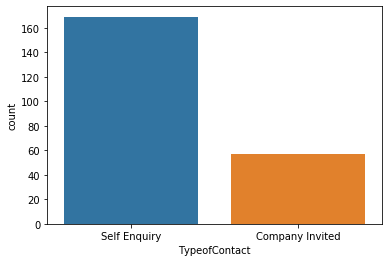

In [8]:
sns.countplot(x='TypeofContact',data=df[pd.isnull(df['Age'])])

In [9]:
df.drop('CustomerID',axis=1,inplace=True)

In [10]:
df['Gender'].replace({'Fe Male':'Female'},inplace=True)

In [11]:
for col in ['TypeofContact','CityTier','Occupation','Gender','ProductPitched','MaritalStatus','Designation']:
        print(df.groupby(col)['Age'].describe().T)
        print()

TypeofContact  Company Invited  Self Enquiry
count              1362.000000   3275.000000
mean                 37.286344     37.819542
std                   8.801106      9.520456
min                  18.000000     18.000000
25%                  31.000000     31.000000
50%                  36.000000     36.000000
75%                  43.000000     44.000000
max                  61.000000     61.000000

CityTier            1           2            3
count     3010.000000  189.000000  1463.000000
mean        37.692691   38.687831    37.339713
std          9.304757    9.282958     9.338232
min         18.000000   19.000000    18.000000
25%         31.000000   31.000000    31.000000
50%         36.000000   38.000000    36.000000
75%         44.000000   44.000000    44.000000
max         61.000000   60.000000    61.000000

Occupation  Free Lancer  Large Business     Salaried  Small Business
count          2.000000      414.000000  2254.000000     1992.000000
mean          37.500000       36

In [12]:
df.groupby(['Gender','Designation'])['Age'].mean()

Gender  Designation   
Female  AVP               48.000000
        Executive         33.209449
        Manager           37.621543
        Senior Manager    40.825153
        VP                49.036585
Male    AVP               48.049451
        Executive         32.961430
        Manager           37.211618
        Senior Manager    40.390361
        VP                47.527027
Name: Age, dtype: float64

In [13]:
df.groupby(['MaritalStatus','Designation'])['Age'].mean()

MaritalStatus  Designation   
Divorced       AVP               48.113636
               Executive         34.572848
               Manager           36.753894
               Senior Manager    41.598592
               VP                48.346154
Married        AVP               47.777108
               Executive         34.260582
               Manager           37.599509
               Senior Manager    40.385224
               VP                47.674603
Single         AVP               48.902439
               Executive         30.442013
               Manager           37.497409
               Senior Manager    42.740000
               VP                48.730769
Unmarried      AVP               41.666667
               Executive         32.087432
               Manager           37.390093
               Senior Manager    39.535294
Name: Age, dtype: float64

In [14]:
df['Age']=df.apply(lambda x: round(df[(df['MaritalStatus']==x['MaritalStatus']) & (df['Designation']==x['Designation'])]['Age'].mean(),2) if pd.isnull(x['Age']) else x['Age'],axis=1)

In [15]:
num_col = ['Age','DurationOfPitch','NumberOfTrips','MonthlyIncome']
cat_col = ['ProdTaken','NumberOfChildrenVisiting','Designation','OwnCar','PitchSatisfactionScore','Passport','MaritalStatus','PreferredPropertyStar','ProductPitched','NumberOfFollowups','NumberOfPersonVisiting','Gender','Occupation','CityTier','TypeofContact','ProdTaken']

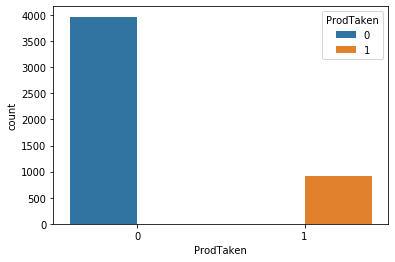

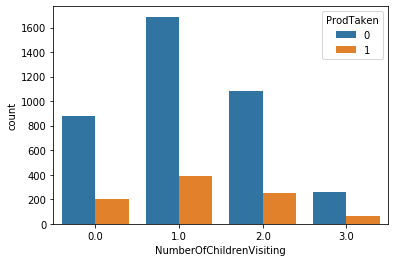

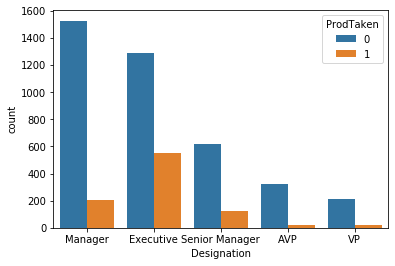

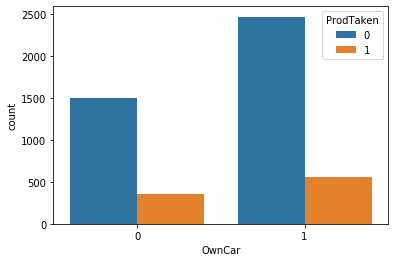

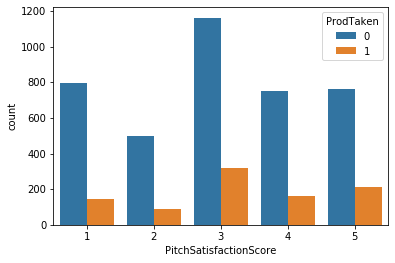

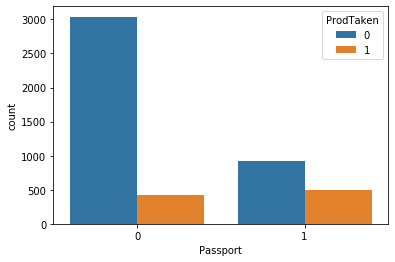

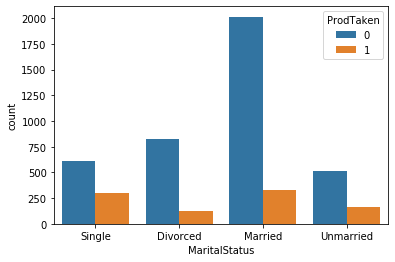

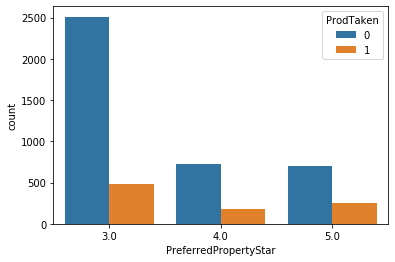

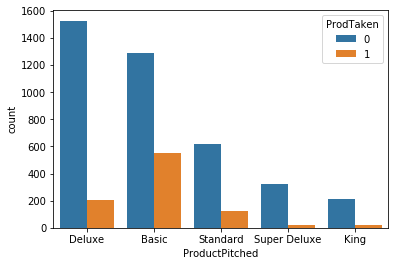

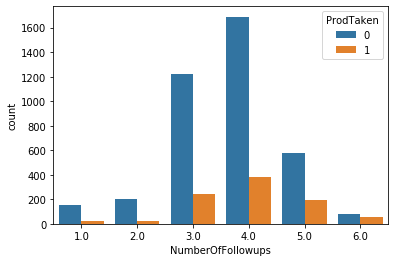

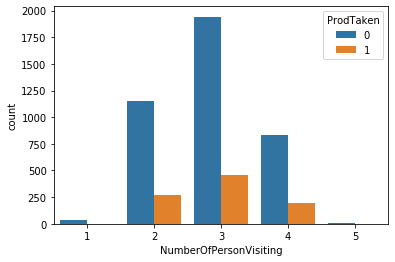

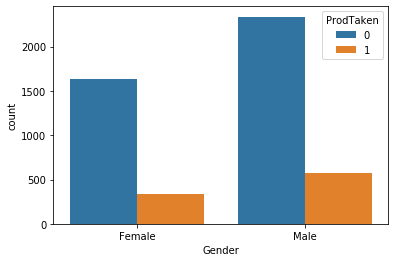

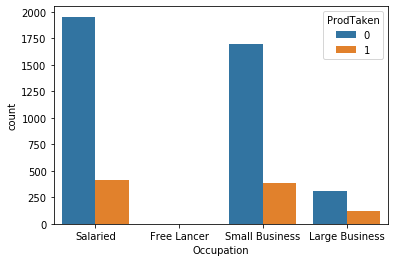

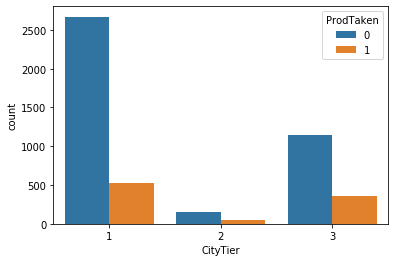

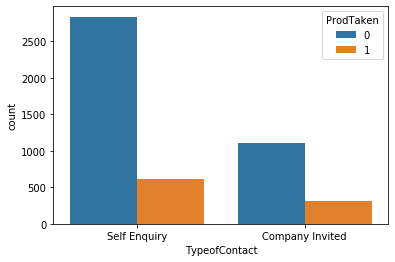

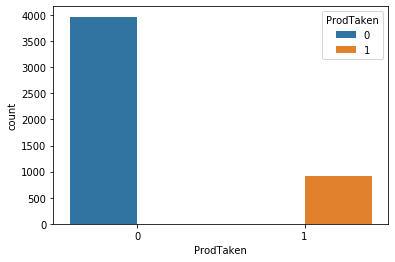

In [16]:
for col in cat_col:
    sns.countplot(x=col,data=df,hue='ProdTaken')
    plt.show()

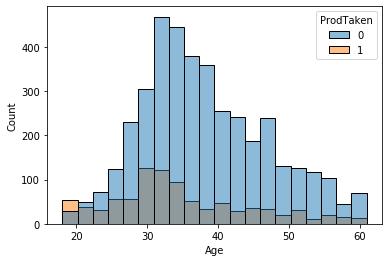

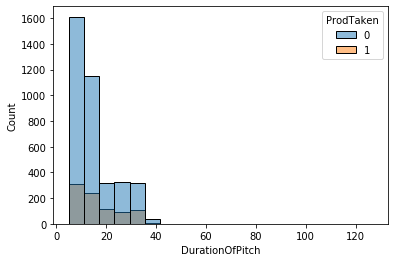

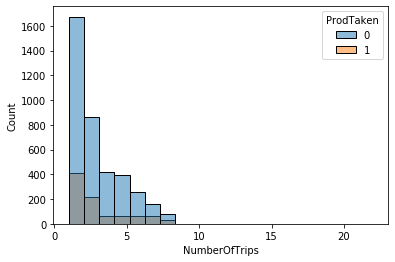

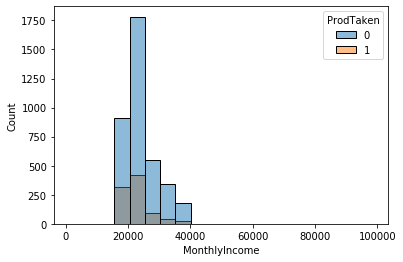

In [17]:
for col in num_col:
    sns.histplot(x=col,data=df,hue='ProdTaken',bins=20)
    plt.show()

Important Features After Analysis: PreferredPropertyStar,Occupation,CityTier,ProductPiched,Designation,Age,MonthlyIncome,NumberOfTrips,DurationOfPitch

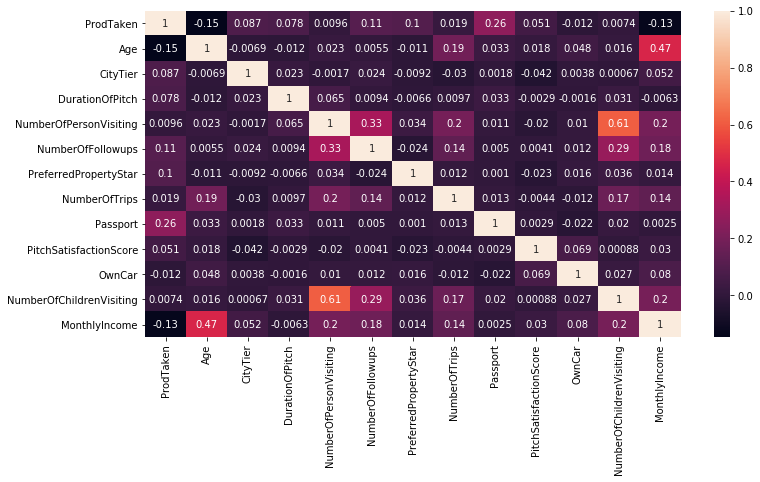

In [18]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),data=df,annot=True)

In [19]:
df.drop('NumberOfChildrenVisiting',axis=1,inplace=True)

In [20]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome
0,1,41.00,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,Manager,20993.0
1,0,49.00,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0
2,1,37.00,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,Executive,17090.0
3,0,33.00,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0
4,0,34.57,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0


In [21]:
df.drop('Gender',axis=1,inplace=True)

In [22]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome
0,1,41.00,Self Enquiry,3,6.0,Salaried,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,Manager,20993.0
1,0,49.00,Company Invited,1,14.0,Salaried,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0
2,1,37.00,Self Enquiry,1,8.0,Free Lancer,3,4.0,Basic,3.0,Single,7.0,1,3,0,Executive,17090.0
3,0,33.00,Company Invited,1,9.0,Salaried,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0
4,0,34.57,Self Enquiry,1,8.0,Small Business,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0


In [23]:
df.groupby('NumberOfFollowups')['ProdTaken'].describe().T

NumberOfFollowups,1.0,2.0,3.0,4.0,5.0,6.0
count,176.000000,229.000000,1466.000000,2068.000000,768.000000,136.000000
mean,0.113636,0.104803,0.166439,0.183269,0.248698,0.397059
std,0.318275,0.306971,0.372602,0.386980,0.432540,0.491097
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
pd.crosstab(index=df['NumberOfFollowups'],columns=df['ProdTaken'])

ProdTaken,0,1
NumberOfFollowups,,
1.0,156,20
2.0,205,24
3.0,1222,244
4.0,1689,379
5.0,577,191
6.0,82,54


In [25]:
df['NumberOfFollowups'].fillna(value=df['NumberOfFollowups'].mode()[0],inplace=True)

In [26]:
df['NumberOfTrips'].fillna(value=df['NumberOfTrips'].mode()[0],inplace=True)

In [27]:
df.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact              25
CityTier                    0
DurationOfPitch           251
Occupation                  0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar      26
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
Designation                 0
MonthlyIncome             233
dtype: int64

In [28]:
round(df.groupby('Designation')['MonthlyIncome'].mean())

Designation
AVP               32241.0
Executive         19940.0
Manager           22643.0
Senior Manager    26638.0
VP                35879.0
Name: MonthlyIncome, dtype: float64

In [29]:
df['MonthlyIncome']=df.apply(lambda x: round(df[(df['Age']==x['Age']) & (df['Designation']==x['Designation'])]['MonthlyIncome'].mean()) if pd.isnull(x['MonthlyIncome']) else x['MonthlyIncome'],axis=1)

In [30]:
df['TypeofContact'].value_counts()

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64

In [31]:
pd.crosstab(index=df['TypeofContact'],columns=df['ProdTaken'])

ProdTaken,0,1
TypeofContact,,
Company Invited,1109,310
Self Enquiry,2837,607


In [32]:
df.drop('TypeofContact',axis=1,inplace=True)

In [33]:
df.head()

,ProdTaken,Age,CityTier,DurationOfPitch,Occupation,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome
0,1,41.00,3,6.0,Salaried,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,Manager,20993.0
1,0,49.00,1,14.0,Salaried,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0
2,1,37.00,1,8.0,Free Lancer,3,4.0,Basic,3.0,Single,7.0,1,3,0,Executive,17090.0
3,0,33.00,1,9.0,Salaried,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0
4,0,34.57,1,8.0,Small Business,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0


In [34]:
df.isnull().sum()

ProdTaken                   0
Age                         0
CityTier                    0
DurationOfPitch           251
Occupation                  0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar      26
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
Designation                 0
MonthlyIncome               0
dtype: int64

In [35]:
df['PreferredPropertyStar'].value_counts()

3.0    2993
5.0     956
4.0     913
Name: PreferredPropertyStar, dtype: int64

In [36]:
df['PreferredPropertyStar'].fillna(value=df['PreferredPropertyStar'].mode()[0],inplace=True)

In [37]:
pd.crosstab(index=df['DurationOfPitch'],columns=df['ProdTaken'])

ProdTaken,0,1
DurationOfPitch,,
5.0,6,0
6.0,268,39
7.0,294,48
8.0,273,60
9.0,404,79
10.0,199,45
11.0,168,37
12.0,162,33
13.0,191,32


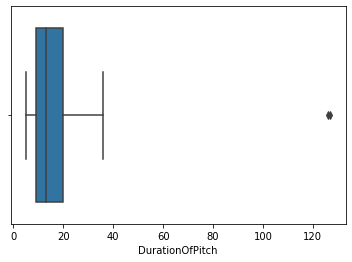

In [38]:
sns.boxplot(df['DurationOfPitch'])

In [39]:
df[(pd.isnull(df['DurationOfPitch'])==False)][df['ProdTaken']==1]['DurationOfPitch'].mean()

16.873142857142856

In [40]:
df[(pd.isnull(df['DurationOfPitch'])==False)][df['ProdTaken']==0]['DurationOfPitch'].mode()[0]

9.0

In [41]:
df['ProdTaken'].value_counts()

0    3968
1     920
Name: ProdTaken, dtype: int64

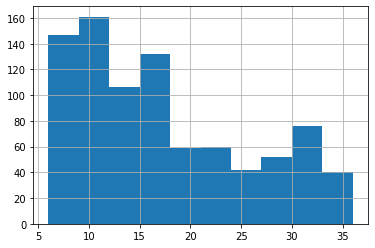

In [42]:
df[df['ProdTaken']==1]['DurationOfPitch'].hist()

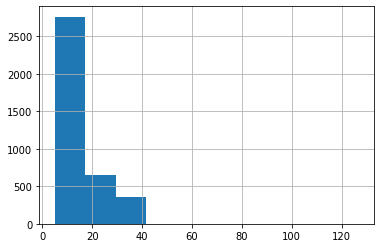

In [43]:
df[df['ProdTaken']==0]['DurationOfPitch'].hist()

In [44]:
df['DurationOfPitch']=df['DurationOfPitch'].apply(lambda x: 17.0 if pd.isnull(x) else x)

In [45]:
df.isnull().sum()

ProdTaken                 0
Age                       0
CityTier                  0
DurationOfPitch           0
Occupation                0
NumberOfPersonVisiting    0
NumberOfFollowups         0
ProductPitched            0
PreferredPropertyStar     0
MaritalStatus             0
NumberOfTrips             0
Passport                  0
PitchSatisfactionScore    0
OwnCar                    0
Designation               0
MonthlyIncome             0
dtype: int64

### Checking For Outliers

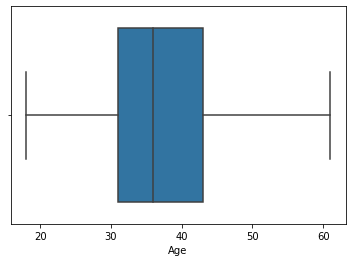

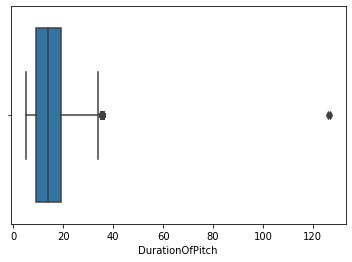

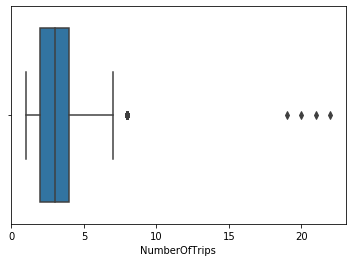

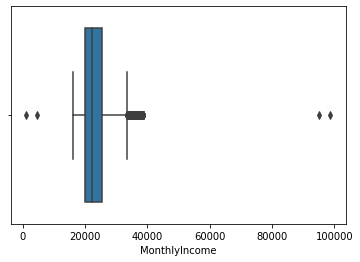

In [46]:
for col in num_col:
    sns.boxplot(x=col,data=df)
    plt.show()

In [47]:
df2=df
for i in range(2):
    NOT_out = df2['NumberOfTrips']
    q1 = NOT_out.quantile(0.25)
    q3 = NOT_out.quantile(0.75)
    iqr = q3-q1
    min_q = q1 - 1.5*iqr
    max_q = q3 + 1.5*iqr
    NOT_fil = NOT_out[(NOT_out >= min_q)&(NOT_out <= max_q)]


In [48]:
print(min_q,max_q)

-1.0 7.0


In [49]:
df1=df
for i in range(2):
    income_out = df1['MonthlyIncome']
    q1 = income_out.quantile(0.25)
    q3 = income_out.quantile(0.75)
    iqr = q3-q1
    min_q = q1 - 1.5*iqr
    max_q = q3 + 1.5*iqr
    income_fil = income_out[(income_out >= min_q)&(income_out <= max_q)]

In [50]:
print(min_q,max_q)

12107.875 33414.875


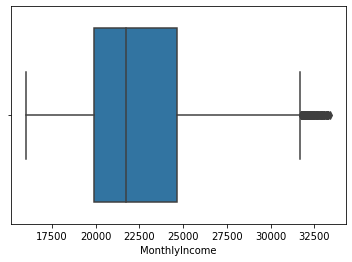

In [51]:
sns.boxplot(x=col,data=df[(df['MonthlyIncome']>12108)&(df['MonthlyIncome']<33415)])

In [52]:
df = df[(df['MonthlyIncome']>12108)&(df['MonthlyIncome']<33415)&(df['DurationOfPitch']<37)]

In [53]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['Occupation']= label_encoder.fit_transform(df['Occupation'])

df['ProductPitched']= label_encoder.fit_transform(df['ProductPitched'])

df['MaritalStatus']= label_encoder.fit_transform(df['MaritalStatus'])

df['Designation']= label_encoder.fit_transform(df['Designation'])

In [54]:
df.head()

,ProdTaken,Age,CityTier,DurationOfPitch,Occupation,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome
0,1,41.00,3,6.0,2,3,3.0,1,3.0,2,1.0,1,2,1,2,20993.0
1,0,49.00,1,14.0,2,3,4.0,1,4.0,0,2.0,0,3,1,2,20130.0
2,1,37.00,1,8.0,0,3,4.0,0,3.0,2,7.0,1,3,0,1,17090.0
3,0,33.00,1,9.0,2,2,3.0,0,3.0,0,2.0,1,5,1,1,17909.0
4,0,34.57,1,8.0,3,2,3.0,0,4.0,0,1.0,0,5,1,1,18468.0


In [55]:
x= df.drop('ProdTaken',axis=1)
y= df['ProdTaken']

In [56]:
from sklearn.model_selection import train_test_split
trainx,testx,trainy,testy = train_test_split(x,y,test_size=0.25,random_state=101)

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
model = LogisticRegression().fit(trainx,trainy)

In [59]:
model.score(testx,testy)*100

83.89084507042254

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [112]:
def create_model(x,y,alpha=0):
    global pp
    trainx,testx,trainy,testy = train_test_split(x,y,test_size=0.25,random_state=101)
    model_dt = DecisionTreeClassifier(ccp_alpha=alpha,).fit(trainx,trainy)
    model_rf = RandomForestClassifier(n_estimators=10,).fit(trainx,trainy)
    
    pp = model_dt.cost_complexity_pruning_path(trainx,trainy)
    
    print('Actual Outputs: ')
    print('-'*20)
    print(testy.value_counts())
    print()
    
    print('Decision Tree')
    print('-'*20)
    print('Training Score: ',round(model_dt.score(trainx,trainy)*100,2))
    print('Testing Score: ',round(model_dt.score(testx,testy)*100,2))
    ypred_dt = model_dt.predict(testx)
    print(confusion_matrix(testy,ypred_dt))
    cnf_dt = pd.DataFrame(confusion_matrix(testy,ypred_dt),index=['No','Yes'],columns=['No','Yes'])
    sns.heatmap(cnf_dt,annot=True,fmt='d',cbar=None,cmap='YlGn')
    plt.show()
    
    print()
    print('Random Forest')
    print('-'*20)
    print('Training Score: ',round(model_rf.score(trainx,trainy)*100,2))
    print('Testing Score: ',round(model_rf.score(testx,testy)*100,2))
    ypred_rf = model_rf.predict(testx)
    print(confusion_matrix(testy,ypred_rf))
    cnf_rf = pd.DataFrame(confusion_matrix(testy,ypred_rf),index=['No','Yes'],columns=['No','Yes'])
    sns.heatmap(cnf_rf,annot=True,fmt='d',cbar=None,cmap='YlGn')
    
    return (model_dt,model_rf)

Actual Outputs: 
--------------------
0    919
1    217
Name: ProdTaken, dtype: int64

Decision Tree
--------------------
Training Score:  100.0
Testing Score:  90.14
[[860  59]
 [ 53 164]]


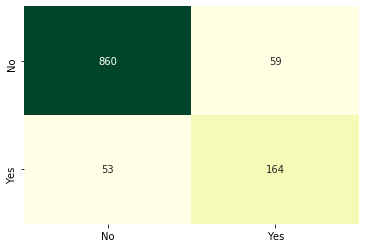


Random Forest
--------------------
Training Score:  99.44
Testing Score:  91.11
[[905  14]
 [ 87 130]]


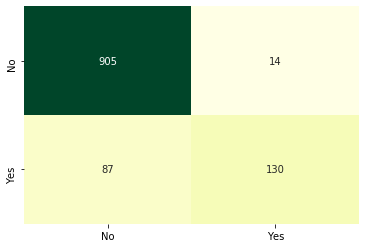

In [113]:
model_dt,model_rf=create_model(x,y)

In [63]:
imp_dt = pd.DataFrame(model_dt.feature_importances_,index=x.columns,columns=['Imp'])

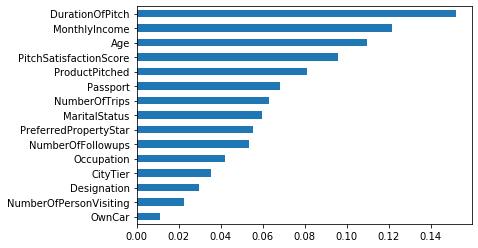

In [64]:
p=imp_dt['Imp'].sort_values().plot.barh()

In [65]:
imp_rf = pd.DataFrame(model_rf.feature_importances_,index=x.columns,columns=['Imp'])

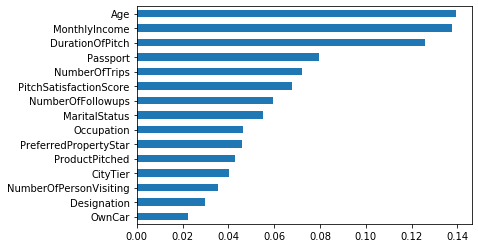

In [66]:
p=imp_rf['Imp'].sort_values().plot.barh()

### Checking for Overfitting (Pruning and Cross Validation)

### cost_complexity_pruning_path

In [67]:
pp

{'ccp_alphas': array([0.        , 0.00014458, 0.00019065, 0.0001939 , 0.00023343,
        0.00023488, 0.00024467, 0.0002569 , 0.00026424, 0.00026691,
        0.00026691, 0.00027263, 0.00027263, 0.00027525, 0.00027892,
        0.00027962, 0.00028137, 0.00028137, 0.00028186, 0.00028273,
        0.00028795, 0.00028922, 0.00029096, 0.0002936 , 0.0002936 ,
        0.000343  , 0.00035232, 0.00035817, 0.00037697, 0.00038034,
        0.00038408, 0.00038435, 0.00039147, 0.00039147, 0.00039147,
        0.00039147, 0.00039147, 0.00039147, 0.00039147, 0.00039147,
        0.00039147, 0.00041104, 0.0004111 , 0.00043061, 0.00043496,
        0.0004404 , 0.0004404 , 0.0004404 , 0.0004404 , 0.0004404 ,
        0.0004404 , 0.00044998, 0.00045671, 0.00045671, 0.00045671,
        0.00045883, 0.00046188, 0.00046747, 0.00046976, 0.00046976,
        0.00046976, 0.00046976, 0.00047256, 0.00047428, 0.0004771 ,
        0.00048508, 0.00048933, 0.00048933, 0.00048933, 0.00048933,
        0.00049912, 0.00050331, 0.

In [68]:
ccp_alpha = pp['ccp_alphas']
ccp_imp = pp['impurities']

In [69]:
clfs=[]
for alpha in ccp_alpha:
    clf = DecisionTreeClassifier(ccp_alpha=alpha)
    clf.fit(trainx,trainy)
    clfs.append(clf)
print('Number of Nodes in the last tree is: {} with ccp_alpha: {}'.format(clfs[-1].tree_.node_count, ccp_alpha[-1]))

Number of Nodes in the last tree is: 1 with ccp_alpha: 0.02145292312373681


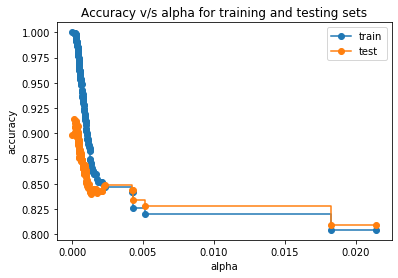

In [70]:
train_scores = [clf.score(trainx,trainy) for clf in clfs]
test_scores = [clf.score(testx,testy) for clf in clfs]

fig,ax = plt.subplots()

ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy v/s alpha for training and testing sets')
ax.plot(ccp_alpha,train_scores, marker='o',label='train',drawstyle='steps-post')
ax.plot(ccp_alpha,test_scores, marker='o',label='test',drawstyle='steps-post')
ax.legend()
plt.show()

Text(0, 0.5, 'Impurities -->')

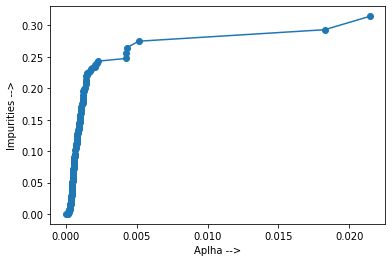

In [71]:
plt.plot(ccp_alpha,ccp_imp,marker='o')
plt.xlabel('Aplha -->')
plt.ylabel('Impurities -->')

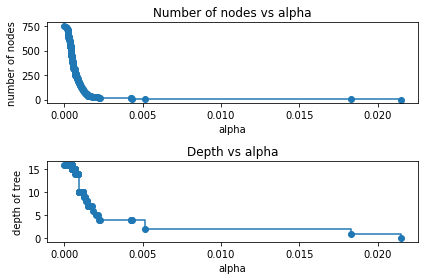

In [72]:
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alpha, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alpha, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [73]:
ccp_alpha.sort()

In [74]:
ccp_alpha

array([0.        , 0.00014458, 0.00019065, 0.0001939 , 0.00023343,
       0.00023488, 0.00024467, 0.0002569 , 0.00026424, 0.00026691,
       0.00026691, 0.00027263, 0.00027263, 0.00027525, 0.00027892,
       0.00027962, 0.00028137, 0.00028137, 0.00028186, 0.00028273,
       0.00028795, 0.00028922, 0.00029096, 0.0002936 , 0.0002936 ,
       0.000343  , 0.00035232, 0.00035817, 0.00037697, 0.00038034,
       0.00038408, 0.00038435, 0.00039147, 0.00039147, 0.00039147,
       0.00039147, 0.00039147, 0.00039147, 0.00039147, 0.00039147,
       0.00039147, 0.00041104, 0.0004111 , 0.00043061, 0.00043496,
       0.0004404 , 0.0004404 , 0.0004404 , 0.0004404 , 0.0004404 ,
       0.0004404 , 0.00044998, 0.00045671, 0.00045671, 0.00045671,
       0.00045883, 0.00046188, 0.00046747, 0.00046976, 0.00046976,
       0.00046976, 0.00046976, 0.00047256, 0.00047428, 0.0004771 ,
       0.00048508, 0.00048933, 0.00048933, 0.00048933, 0.00048933,
       0.00049912, 0.00050331, 0.00050331, 0.0005084 , 0.00050

In [75]:
alpha= ccp_alpha[-9]

Actual Outputs: 
--------------------
0    919
1    217
Name: ProdTaken, dtype: int64

Decision Tree
--------------------
Training Score:  85.11
Testing Score:  84.33
[[874  45]
 [133  84]]


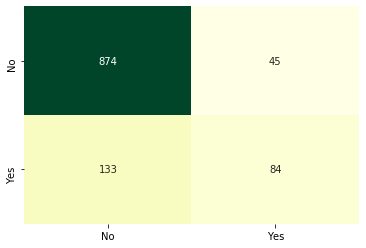


Random Forest
--------------------
Training Score:  100.0
Testing Score:  93.4
[[911   8]
 [ 67 150]]


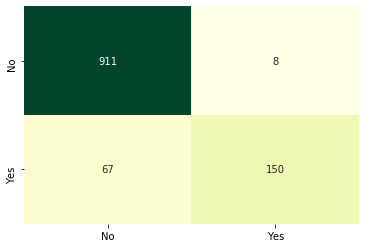

In [76]:
model_dt_p,model_rf_p = create_model(x,y,alpha)

In [162]:
x2= df[['Age','MonthlyIncome','DurationOfPitch','NumberOfTrips']]
y2=y.copy()

In [163]:
trainx1,testx1,trainy1,testy1 = train_test_split(x2,y2,test_size=0.25,random_state=101)

Actual Outputs: 
--------------------
0    919
1    217
Name: ProdTaken, dtype: int64

Decision Tree
--------------------
Training Score:  99.91
Testing Score:  85.48
[[831  88]
 [ 77 140]]


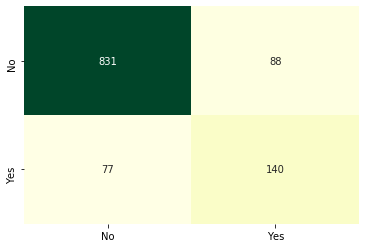


Random Forest
--------------------
Training Score:  98.83
Testing Score:  87.85
[[887  32]
 [106 111]]


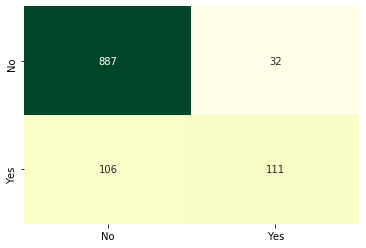

In [164]:
model_dt1,model_rf1 = create_model(x2,y2)

In [165]:
ccp_alpha1 = pp['ccp_alphas']
ccp_imp1 = pp['impurities']

In [166]:
clfs1=[]
for alpha in ccp_alpha1:
    clf = DecisionTreeClassifier(ccp_alpha=alpha)
    clf.fit(trainx1,trainy1)
    clfs1.append(clf)
print('Number of Nodes in the last tree is: {} with ccp_alpha: {}'.format(clfs1[-1].tree_.node_count, ccp_alpha1[-1]))

Number of Nodes in the last tree is: 3 with ccp_alpha: 0.009587748060942203


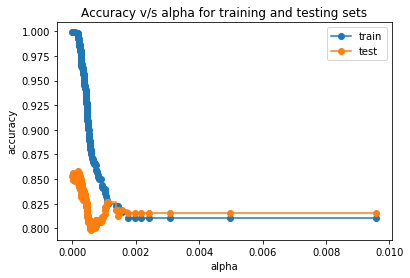

In [167]:
train_scores = [clf.score(trainx1,trainy1) for clf in clfs1]
test_scores = [clf.score(testx1,testy1) for clf in clfs1]

fig,ax = plt.subplots()

ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy v/s alpha for training and testing sets')
ax.plot(ccp_alpha1,train_scores, marker='o',label='train',drawstyle='steps-post')
ax.plot(ccp_alpha1,test_scores, marker='o',label='test',drawstyle='steps-post')
ax.legend()
plt.show()

Text(0, 0.5, 'Impurities -->')

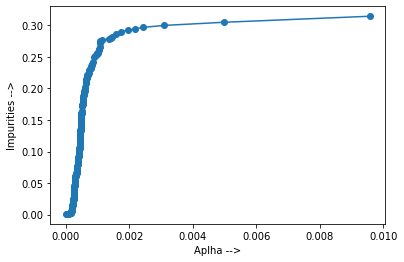

In [168]:
plt.plot(ccp_alpha1,ccp_imp1,marker='o')
plt.xlabel('Aplha -->')
plt.ylabel('Impurities -->')

In [169]:
ccp_alpha1.sort()

In [170]:
ccp_alpha1

array([0.00000000e+00, 3.91466040e-05, 3.91466040e-05, 4.40399295e-05,
       9.78665101e-05, 1.42064289e-04, 1.63110850e-04, 1.63110850e-04,
       1.76159718e-04, 1.76159718e-04, 1.77063101e-04, 1.81752090e-04,
       1.88742555e-04, 1.88983606e-04, 1.89419052e-04, 1.89616363e-04,
       1.90714225e-04, 1.93316563e-04, 1.94401503e-04, 1.95733020e-04,
       1.95733020e-04, 1.95733020e-04, 1.95733020e-04, 1.95733020e-04,
       1.95733020e-04, 1.95733020e-04, 1.95733020e-04, 2.01852534e-04,
       2.14455309e-04, 2.15306322e-04, 2.20199648e-04, 2.20199648e-04,
       2.20199648e-04, 2.24440530e-04, 2.25845792e-04, 2.27762060e-04,
       2.34879624e-04, 2.34879624e-04, 2.34879624e-04, 2.34879624e-04,
       2.34879624e-04, 2.34879624e-04, 2.40217797e-04, 2.44666275e-04,
       2.44666275e-04, 2.51656740e-04, 2.51656740e-04, 2.51656740e-04,
       2.51656740e-04, 2.51656740e-04, 2.51656740e-04, 2.56899589e-04,
       2.56899589e-04, 2.56899589e-04, 2.60977360e-04, 2.60977360e-04,
      

In [229]:
alpha1 = ccp_alpha1[-11]

Actual Outputs: 
--------------------
0    919
1    217
Name: ProdTaken, dtype: int64

Decision Tree
--------------------
Training Score:  82.3
Testing Score:  81.87
[[884  35]
 [171  46]]


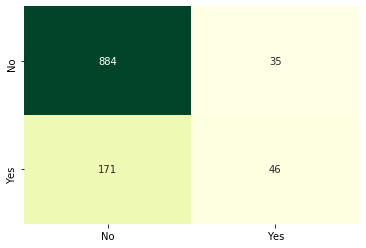


Random Forest
--------------------
Training Score:  98.36
Testing Score:  88.64
[[891  28]
 [101 116]]


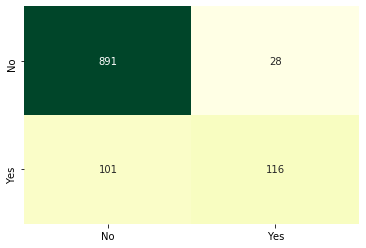

In [230]:
model_dt_f,model_rf_f = create_model(x2,y2,alpha1)

In [173]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x2,y2,test_size=0.25,random_state=1)

In [174]:
model = KNeighborsClassifier(n_neighbors=4).fit(xtrain,ytrain)

In [175]:
model.score(xtest,ytest)

0.789612676056338

In [176]:
scores_train = []
scores_test = []
for i in range(2,50):
    model_i = KNeighborsClassifier(n_neighbors=i).fit(xtrain,ytrain)
    scores_train.append(model_i.score(xtrain,ytrain))
    scores_test.append(model_i.score(xtest,ytest))

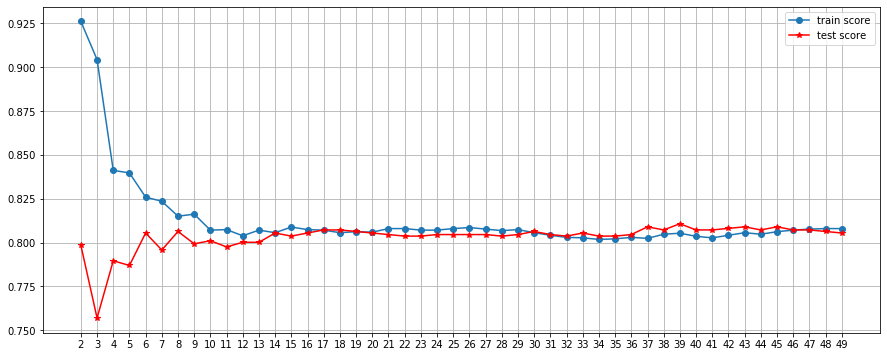

In [177]:
plt.figure(figsize=(15,6))
p=plt.plot(range(2,50),scores_train,marker='o',label='train score')
p=plt.plot(range(2,50),scores_test,marker='*',color='r',label='test score')
p=plt.grid()
p=plt.xticks(range(2,50))
plt.legend()

In [178]:
model_dt_test = DecisionTreeClassifier().fit(xtrain,ytrain)

In [179]:
model_dt_test.score(xtest,ytest)

0.8556338028169014

In [205]:
criterions = ['gini','entropy']
n_est = list(range(5,100,15))
max_depth = list(range(15,100,10))

params = {
           'n_estimators': n_est,
           'criterion': criterions,
           'max_depth':max_depth
         }

### Finding the best parameter values 

In [206]:
from sklearn.model_selection import GridSearchCV

In [207]:
g_model = GridSearchCV(RandomForestClassifier(),param_grid=params,verbose=3)  # Same as nested forloops to test multiple parameters
g_model.fit(xtrain,ytrain)     

Fitting 5 folds for each of 126 candidates, totalling 630 fits
[CV 1/5] END ...criterion=gini, max_depth=15, n_estimators=5; total time=   0.0s
[CV 2/5] END ...criterion=gini, max_depth=15, n_estimators=5; total time=   0.0s
[CV 3/5] END ...criterion=gini, max_depth=15, n_estimators=5; total time=   0.0s
[CV 4/5] END ...criterion=gini, max_depth=15, n_estimators=5; total time=   0.0s
[CV 5/5] END ...criterion=gini, max_depth=15, n_estimators=5; total time=   0.0s
[CV 1/5] END ..criterion=gini, max_depth=15, n_estimators=20; total time=   0.2s
[CV 2/5] END ..criterion=gini, max_depth=15, n_estimators=20; total time=   0.2s
[CV 3/5] END ..criterion=gini, max_depth=15, n_estimators=20; total time=   0.3s
[CV 4/5] END ..criterion=gini, max_depth=15, n_estimators=20; total time=   0.2s
[CV 5/5] END ..criterion=gini, max_depth=15, n_estimators=20; total time=   0.2s
[CV 1/5] END ..criterion=gini, max_depth=15, n_estimators=35; total time=   0.4s
[CV 2/5] END ..criterion=gini, max_depth=15, n

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [15, 25, 35, 45, 55, 65, 75, 85, 95],
                         'n_estimators': [5, 20, 35, 50, 65, 80, 95]},
             verbose=3)

In [208]:
g_model.best_estimator_

RandomForestClassifier(max_depth=85, n_estimators=65)

In [209]:
g_model.best_params_

{'criterion': 'gini', 'max_depth': 85, 'n_estimators': 65}

In [274]:
model_best_GSCV = RandomForestClassifier(criterion='gini',max_depth=85,n_estimators=65).fit(xtrain,ytrain)

In [275]:
model_best_GSCV.score(xtest,ytest)

0.8961267605633803

In [276]:
model_best_GSCV.score(xtrain,ytrain)

0.998825601879037

### BaggingClassifier

In [277]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import KFold,cross_val_score

In [278]:
seed = 8
kfold = KFold(n_splits = 3,
                       random_state = seed,shuffle=True)
  
# initialize the base classifier
base_cls = DecisionTreeClassifier()
  
# no. of base classifier
num_trees = 50
  
# bagging classifier
model = BaggingClassifier(base_estimator = base_cls,
                          n_estimators = num_trees,
                          random_state = seed)
  
results = cross_val_score(model, x2, y2, cv = kfold)
print("accuracy :")
print(results.mean())

accuracy :
0.8775869660942316


In [279]:
model.fit(xtrain,ytrain)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50,
                  random_state=8)

In [280]:
from sklearn.metrics import accuracy_score

In [281]:
ypred = model.predict(xtest)

In [282]:
print(accuracy_score(ypred,ytest))

0.8926056338028169


In [283]:
ypred_t = model.predict(xtrain)
print(accuracy_score(ypred_t,ytrain))

0.9982384028185555


### Deployment

In [284]:
final_model = model_best_GSCV

In [285]:
pd.to_pickle(final_model,'TourPackagePredictor')

In [286]:
model = pd.read_pickle('TourPackagePredictor')

In [300]:
MonthlyIncome = eval(input("Enter customer's MonthlyIncome: "))
Age = eval(input("Enter customer's age: "))
DurOfPitch = eval(input('Enter Duration of Pitch: '))
NoOfTrips =  eval(input('Enter the no of trips done by customer: '))

query = pd.DataFrame({
    'MonthlyIncome':[MonthlyIncome],
    'Age':[Age],
    'DurationOfPitch':[DurOfPitch],
    'NumberOfTrips': [NoOfTrips]
})

Enter customer's MonthlyIncome: 20993
Enter customer's age: 41
Enter Duration of Pitch: 6
Enter the no of trips done by customer: 1


In [301]:
query

,MonthlyIncome,Age,DurationOfPitch,NumberOfTrips
0,20993,41,6,1


In [302]:
Prodtaken = model.predict(query)[0]
Prodtaken

0